In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
df = pd.read_csv('trimmed_data.csv',index_col = 0)

## data set sorted according to the revenue

In [3]:
df = df.sort_values(by = ['revenue'],ascending=False)
df.head(5)


,title,genres,original_language,production_countries,release_date,runtime,popularity,vote_count,vote_average,budget,revenue
0,Avatar,"('Action', 'Adventure', 'Fantasy', 'Science Fi...",en,"('United Kingdom', 'United States of America')",2009-12-10,162.0,150.437577,11800,7.2,237000000,2787965087
31074,Star Wars: The Force Awakens,"('Action', 'Adventure', 'Fantasy', 'Science Fi...",en,"('United States of America',)",2015-12-15,136.0,31.626013,7993,7.5,245000000,2068223624
25,Titanic,"('Drama', 'Romance', 'Thriller')",en,"('United States of America',)",1997-11-18,194.0,100.025899,7562,7.5,200000000,1845034188
16,The Avengers,"('Action', 'Adventure', 'Science Fiction')",en,"('United States of America',)",2012-04-25,143.0,144.448633,11776,7.4,220000000,1519557910
28,Jurassic World,"('Action', 'Adventure', 'Science Fiction', 'Th...",en,"('United States of America',)",2015-06-09,124.0,418.708552,8662,6.5,150000000,1513528810


## Movie genres of the top 50 revenues

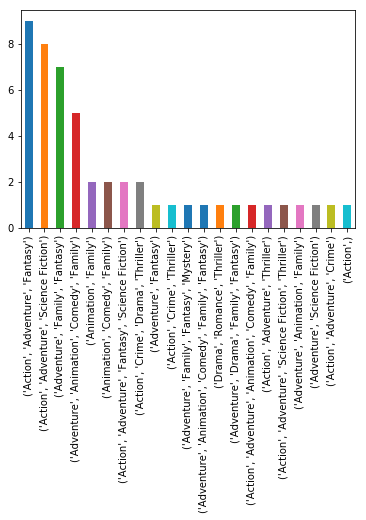

In [4]:
pd.value_counts(df.head(50)['genres']).plot.bar()
f1 = plt.gcf()

## Movie production countries from top 100 movie revenues

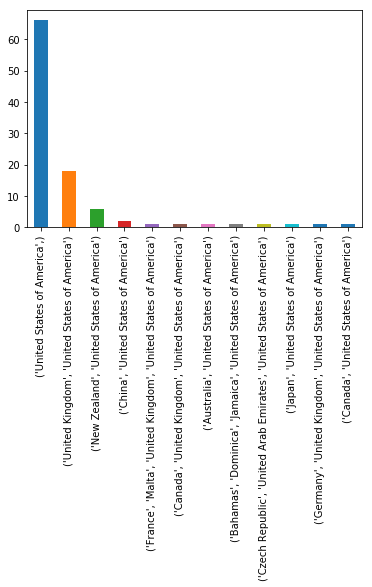

In [5]:
pd.value_counts(df.head(100)['production_countries']).plot.bar()
f1 = plt.gcf()

## Relation between the title length and revenue

In [6]:
lenth_rev = df[['title','revenue']]

In [7]:
lenth_rev['title'] = lenth_rev['title'].apply(len)

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
lenth_rev.head(5)

,title,revenue
0,6,2787965087
31074,28,2068223624
25,7,1845034188
16,12,1519557910
28,14,1513528810


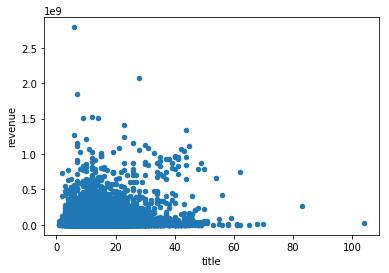

In [9]:
fig = lenth_rev.plot.scatter(y='revenue',x='title')

## Relation between the movie runtime and revenue

In [27]:
timelenth_rev = df[['runtime','revenue']]

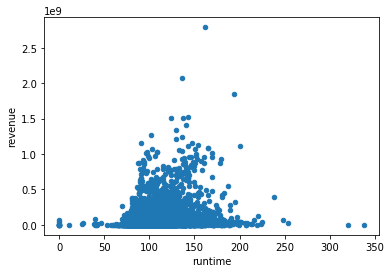

In [28]:
fig = timelenth_rev.plot.scatter(x = 'runtime', y = 'revenue')

## Movie release month of top 50 movie revenues


In [29]:
date_rev = df[['release_date','revenue']]
date_rev['release_date']=date_rev['release_date'].str[5:7]

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


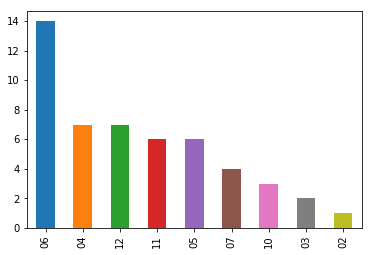

In [31]:
pd.value_counts(date_rev.head(50)['release_date']).plot.bar()
f1 = plt.gcf()